# Handwritten Digits Recognizer Using Two (2) - Layer Neural Network

In this notebook, I built a basic two-layer neural network from scratch. I trained it on the MNIST handwritten digits dataset. The main goal was to understand the math behind neural networks:

- Forward and backward propagation
- Activations
- Loss functions
- Gradient updates

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Loading Train Data

In [2]:
train = pd.read_csv("train.csv")


# Loading Test Data

In [3]:
test = pd.read_csv("test.csv")



# Data Visualization

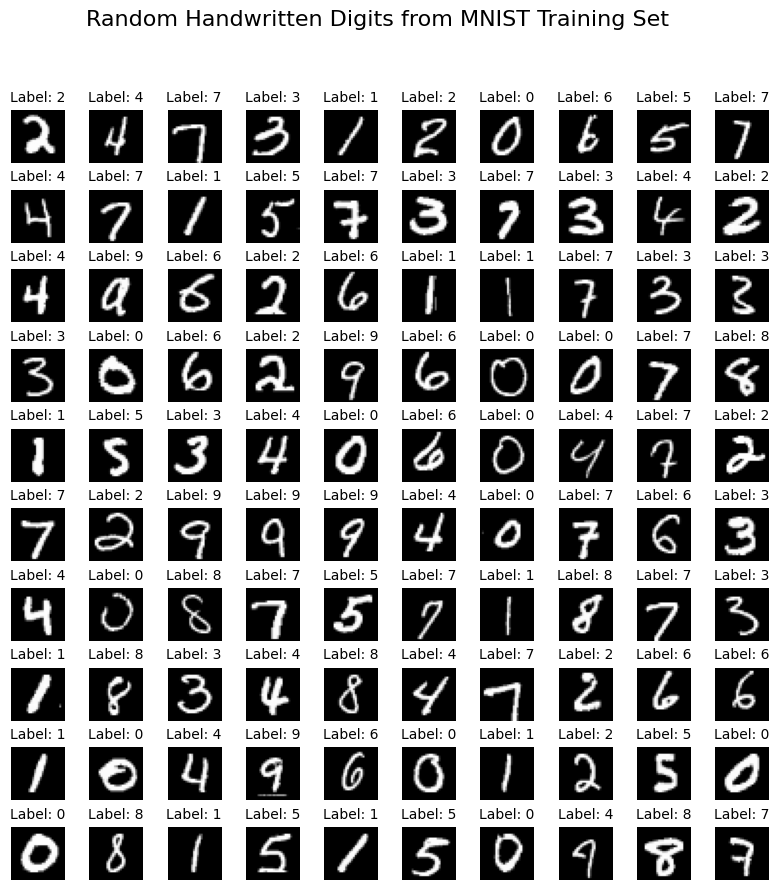

In [4]:
# Visualize 10x10 random digits from the training set
rows = 10
cols = 10
fig = plt.figure(figsize=(10, 10))  

# Randomly select 100 examples
indexes = np.random.choice(len(train), rows * cols, replace=False)

count = 0
for i in range(rows):
    for j in range(cols):
        idx = indexes[count]
        ax = fig.add_subplot(rows, cols, count + 1)
        
        # Extract the pixel values and reshape to 28x28
        pixels = train.iloc[idx, 1:].values 
        pixels = pixels.reshape(28, 28)
        
        ax.imshow(pixels, cmap='gray')
        ax.set_title(f"Label: {train.iloc[idx, 0]}", fontsize=10)
        ax.axis('off')
        
        count += 1

plt.subplots_adjust(wspace=0.1, hspace=0.5)  
plt.suptitle("Random Handwritten Digits from MNIST Training Set", fontsize=16)
plt.show()

# Checking First and last Five Rows of Train set

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.shape

(42000, 785)

In the Table:

Row = number of examples (samples / images) (m)

Column = number of features (n)

Covert Data To Numpy Array & Shuffle it

In [8]:
data = train.to_numpy()

# Split data into Val set and Train set and Transpose

In [9]:
indices = np.random.permutation(m)

X = data[indices, 1:]  # Features (pixels) in random order, aligned with y
y = data[indices, 0]   # Labels in the same random order (perfectly aligned with x)

NameError: name 'm' is not defined

In [ ]:
n_dev = 1000

# Split using m and n_dev
X_dev   = X[:n_dev]        # first n_dev examples → validation features
y_dev   = y[:n_dev]        # matching labels
X_train = X[n_dev:]        # remaining m - n_dev examples → training features
y_train = y[n_dev:]        # matching labels


# Shape of X & Y

In [ ]:
print("X.shape:", X.shape)   
print("y.shape:", y.shape)   
print("X_dev.shape:", X_dev.shape)     
print("y_dev.shape:", y_dev.shape)    
print("X_train.shape:", X_train.shape) 

X.shape: (42000, 784)
y.shape: (42000,)
X_dev.shape: (1000, 784)
y_dev.shape: (1000,)
X_train.shape: (41000, 784)


# One Hot Econding

- Since the shape of y is (m,), one hot encoidng is needed 
- to comvert (m,) to (n_ouput,m)

In [ ]:
def one_hot(Y, num_classes=10):
    
    one_hot_Y = np.zeros((Y.size, num_classes))
    
    one_hot_Y[np.arange(Y.size), Y] = 1
    
    return one_hot_Y.T


# Intitialize Parameters

In [ ]:
def init_param(n_input, n_hidden, n_output):
    """
    Initialize weights and biases for a 2-layer neural network.
    
    Args:
        n_input: number of input features
        n_hidden: number of neurons in hidden layer
        n_output: number of output neurons/classes
    
    Returns:
        W1, b1, W2, b2: initialized parameters
    """
    # Input → Hidden
    W1 = np.random.randn(n_hidden, n_input) * 0.1  
    b1 = np.zeros((n_hidden, 1))       
                
    # Hidden → Output
    W2 = np.random.randn(n_output, n_hidden) * 0.1
    b2 = np.zeros((n_output, 1))
    
    return W1, b1, W2, b2


# parameter unpacking

In [ ]:
W1, b1, W2, b2 = init_param(n_input, n_hidden, n_output)

print("W1:", W1.shape)
print("b1:", b1.shape)
print("W2:", W2.shape)
print("b2:", b2.shape)


W1: (10, 784)
b1: (10, 1)
W2: (10, 10)
b2: (10, 1)


# Activation 

- relu
- softmax

In [ ]:
def relu(Z):
    """
    Z: numpy array of shape (n_hidden, m)
    Returns: A = relu(Z), same shape as Z
    """
    return np.maximum(0, Z)


def softmax(Z):
    """
    Z: numpy array of shape (n_output, m)
    Returns: softmax probabilities, same shape
    """
    Z_shift = Z - np.max(Z, axis=0, keepdims=True)
    
    expZ = np.exp(Z_shift)
    
    return expZ / np.sum(expZ, axis=0, keepdims=True)

# Forward Propagation

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
    """
    Forward propagation for a 2-layer neural network.
    
    Args:
        W1, b1: weights and biases for layer 1 (W1: (n_hidden, n_input))
        W2, b2: weights and biases for layer 2 (W2: (n_output, n_hidden))
        X: input data of shape (m, n_input)  ← examples in rows
    
    Returns:
        A2: output probabilities of shape (n_output, m)
        cache: dictionary with intermediates for backprop
    """
    
    # X shape: (m, 784) → transpose to (784, m) for matmul
    
    Z1 = W1 @ X.T + b1          
    
    A1 = relu(Z1)               
    
    Z2 = W2 @ A1 + b2   
            
    A2 = softmax(Z2)    
            
    cache = {
        
    "Z1": Z1,
    
    "A1": A1,
    
    "X": X
}

    
    return A2, cache

# Backpropagation

In [ ]:
def back_prop(A2, cache, Y, W2):
    """
    Backpropagation for a 2-layer neural network
    (ReLU hidden layer + Softmax output layer)

    Inputs:
        A2    : softmax output probabilities, shape (n_output, m)
        cache : dictionary containing forward-pass values
               cache["A1"] -> (n_hidden, m)
               cache["Z1"] -> (n_hidden, m)
               cache["X"]  -> (m, n_input)
        Y     : true labels, shape (n_output, m)
        W2    : weights of output layer, shape (n_output, n_hidden)

    Returns:
        grads : dictionary containing gradients
    """

    X  = cache["X"]
    A1 = cache["A1"]
    Z1 = cache["Z1"]

    m = X.shape[0]

    # Output layer: Softmax + Cross Entropy
    dZ2 = A2 - Y
    dW2 = (1/m) * (dZ2 @ A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    # Hidden layer: ReLu
    dA1 = W2.T @ dZ2
    dZ1 = dA1 * (Z1 > 0)

    dW1 = (1/m) * (dZ1 @ X)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return grads


# Parameter updates

In [ ]:
def param_update(model, grads, learning_rate):

    model["W1"] = model["W1"] -  learning_rate * grads["dW1"]
    model["b1"] = model["b1"] -  learning_rate * grads["db1"]
    model["W2"] = model["W2"] -  learning_rate * grads["dW2"]
    model["b2"] = model["b2"] -  learning_rate * grads["db2"]

    return model


# Prediction Function
- Foward pass with updated paramaters
- Take argmax of softmax output

In [ ]:
def predict(model, X):
    
    W1, b1, W2, b2 = model["W1"], model["b1"], model["W2"], model["b2"]
    
    A2, _ = forward_prop(W1, b1, W2, b2, X)
    
    return np.argmax(A2, axis=0)

    
    
    
    

# Accuracy

In [ ]:
# Get accuracy
def accuracy_func(predictions, Y):
    
    print(predictions, Y)  
    
    return np.sum(predictions == Y) / Y.size


# Set Hyperparamaeters

In [ ]:
learning_rate = 0.1
epochs = 100

# Gradient Descent Algorithm

In [ ]:
def gradient_descent(X, Y, iterations=100, alpha=0.1, hidden_size=10):
    m, n_input = X.shape
    output_size = len(np.unique(Y))  # number of classes
    
    # Initialize parameters
    W1, b1, W2, b2 = init_param(n_input, hidden_size, output_size)
    model = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    # One-hot encode labels for backprop
    Y_oh = one_hot(Y)  # shape: (n_classes, m)
    
    for i in range(iterations):
        # Forward propagation
        A2, cache = forward_prop(model["W1"], model["b1"], model["W2"], model["b2"], X)
        
        # Backpropagation
        grads = back_prop(A2, cache, Y_oh, model["W2"])
        
        # Parameter update
        model = param_update(model, grads, alpha)
        
        # Print accuracy every 10 iterations
        if i % 10 == 0:
            Y_pred = predict(model, X)
            acc = accuracy_func(Y_pred, Y)
            print(f"Iteration {i}: Accuracy = {acc:.4f}")
    
    return model


# Model Training

In [ ]:
# Train the model
model = gradient_descent(
    X_train, 
    y_train,       
    iterations=epochs,
    alpha=learning_rate, 
    hidden_size=10
)


[0 0 0 ... 0 0 7] [3 6 2 ... 3 3 7]
Iteration 0: Accuracy = 0.1053
[7 7 7 ... 7 7 7] [3 6 2 ... 3 3 7]
Iteration 10: Accuracy = 0.1052
[1 1 1 ... 1 1 1] [3 6 2 ... 3 3 7]
Iteration 20: Accuracy = 0.1117
[1 1 1 ... 1 1 1] [3 6 2 ... 3 3 7]
Iteration 30: Accuracy = 0.1117
[1 1 1 ... 1 1 1] [3 6 2 ... 3 3 7]
Iteration 40: Accuracy = 0.1117
[1 1 1 ... 1 1 1] [3 6 2 ... 3 3 7]
Iteration 50: Accuracy = 0.1117
[1 1 1 ... 1 1 1] [3 6 2 ... 3 3 7]
Iteration 60: Accuracy = 0.1117
[1 1 1 ... 1 1 1] [3 6 2 ... 3 3 7]
Iteration 70: Accuracy = 0.1117
[1 1 1 ... 1 1 1] [3 6 2 ... 3 3 7]
Iteration 80: Accuracy = 0.1117
[1 1 1 ... 1 1 1] [3 6 2 ... 3 3 7]
Iteration 90: Accuracy = 0.1117


# Evaluation

In [ ]:
# Evaluate on Training Set
Y_train_pred = predict(model, X_train)
train_acc = accuracy_func(Y_train_pred, y_train)
print(f"Training set accuracy: {train_acc:.4f}")



[1 1 1 ... 1 1 1] [3 6 2 ... 3 3 7]
Training set accuracy: 0.1117


In [ ]:
# Evaluate on Development (Validation) Set
Y_dev_pred = predict(model, X_dev)
dev_acc = accuracy_func(Y_dev_pred, y_dev)
print(f"Development set accuracy: {dev_acc:.4f}")


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
# Convert test dataframe to numpy array
X_test = test.to_numpy()

# Make predictions
Y_test_pred = predict(model, X_test)

